<a href="https://colab.research.google.com/github/bgohrani/Convolutional_Neural_Networks/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks


Convolutional Neural Networks or CNNs, are a class of Deep Neural Networks, commonly applied to analze visual imagery and indulge in feature extractions. Sparse connectivity and weight sharing are two important deviations from regular FeedForward Networks which make CNNs suitable to handle and learn image data, which is usually larger in size. Application of FeedForward Networks to such data would result in simultaneous handling of hundreds of millions of parameters which would be time consuming and require more compute resources. CNNs on the other hand require lesser parameters and are able to train more intelligently on image data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
import matplotlib.colors
import math
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
import time
sns.set()
import torchvision.models as models
import copy

#importing essential libraries

In [ ]:
import torchvision
from torchvision.transforms import transforms

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=transforms.ToTensor())

#torchvision is used to generate the CIFAR10 data we will be using 
#trainset, downloads the data and transform is used to convert it to workable tensor form


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',	'truck']						

#We write down the classes in a separate list for validation

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(images.shape)
print(labels[0].item())

#We shuffle our data first and then load it in batches of 4 to see its size and visualize, this is stored in trainloader
#We take one of the batches stored in trainloader using iter and store its images and labels 
#We can then visualize our image and see its corresponding labels 
#Image data is in the  form of a tensor. (3,32,32) refer to the image dimensions 32x32 and 3 channels and 4 images

torch.Size([4, 3, 32, 32])
6


In [ ]:
def visualize(image):
  img = image.numpy()
  img_2 = np.transpose(img,(1,2,0))
  plt.figure(figsize=(1,1))
  plt.imshow(img_2)
  plt.show()

#We write a function for visualizing an image which we can utilize later
#Image in tensor form is converted to numpy first so it can be compatible with matplotlib
#Image is of the size (3x32x32) and is transposed to (32x32x3) after which we can use plt.imshow

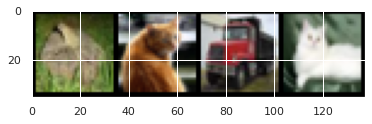

frog cat truck cat


In [ ]:
grid = torchvision.utils.make_grid(images)
plt.imshow(np.transpose(grid.numpy(),(1,2,0)))
plt.show()
print (" ".join([classes[labels[j]] for j in range(4)]))

#We store all the images in a batch in grid using torch.utils.make_grid
#We can then call imshow on the entire grid
#For all the 4 images, we can print out their corresponding ground truth values by looping over their labels

In [ ]:
class CNN_1(nn.Module):

  def __init__(self):
    super(CNN_1,self).__init__()  #Check this 
    self.conv = nn.Conv2d(3,16,5,padding=(1,1),stride=(2,2)) #(3,32,32) --> (16,15,15)
  
  def forward(self,x):
    return self.conv(x)

#Here is our first CNN, we have an init function, (pls check what super means)
#In our init function we define self.conv which works with 3 layer inputs, returns a 16 layered output with a filter size of 5
#Usually a filter of 5 reduces width and height by 4 but because padding = 1, 32 is reduced to 30 
#Stride of 2 halved the width and height
#forward function passes the input through the convolution

class CNN_2(nn.Module):

  def __init__(self):
    super(CNN_2,self).__init__()  #Check this 
    self.conv = nn.Sequential(
        nn.Conv2d(3,8,3),   # (N,3,32,32) -> (N,8,30,30)
        nn.Conv2d(8,16,3)  # (N,8,30,30) -> (N,16,28,28)
    )
    
  
  def forward(self,x):
    return self.conv(x)

#Our second CNN, now has two convolutions instead of one, dimensions mentioned above
#We now use nn.Sequential to specify a set of operations instead of calling each one individually


class CNN_3(nn.Module):

  def __init__(self):
    super(CNN_3,self).__init__()  #Check this 
    self.conv = nn.Sequential(
        nn.Conv2d(3,8,5),   #(N,3,32,32) -> (N,8,28,28)
        nn.AvgPool2d(2,stride=2),  #(N,8,28,28) -> (N,8,14,14)
        nn.Conv2d(8,16,5),  #(N,8,14,14) -> (N,16,10,10)
        nn.AvgPool2d(2,stride=2) #(N,16,10,10) -> (N,16,5,5)
    )
    
  
  def forward(self,x):
    return self.conv(x)

#Just as before, we now also have average pooling with a stride of 2, halved 2d dimensions

torch.Size([4, 16, 15, 15])


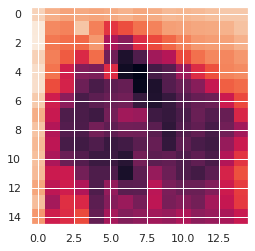

In [ ]:
net = CNN_1()
output = net(images)
print(output.shape)

img = output[0,0,:,:].detach().numpy()
plt.imshow(img)
plt.show()

#We instantiate our network, and pass our images (batch of 4 through it)
#We select the first channel of the first image to visualise

torch.Size([4, 16, 28, 28])


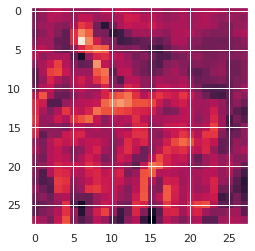

In [ ]:
net = CNN_2()
output = net(images)
print(output.shape)

img = output[0,0,:,:].detach().numpy()
plt.imshow(img)
plt.show()

#Same as before, instantiating and passing through the convolutions 

torch.Size([4, 16, 5, 5])


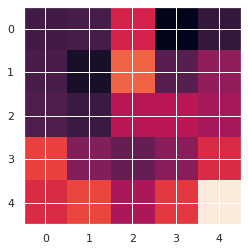

In [ ]:
net = CNN_3()
output = net(images)
print(output.shape)

img = output[0,0,:,:].detach().numpy()
plt.imshow(img)
plt.show()


In [ ]:
class CNN_LeNet(nn.Module):

  def __init__(self):
    super(CNN_LeNet,self).__init__()  #Check this 
    self.conv = nn.Sequential(
        nn.Conv2d(3,6,5),   #(N,3,32,32) -> (N,6,28,28)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2),  #(N,6,28,28) -> (N,6,14,14)
        nn.Conv2d(6,16,5),  #(N,6,14,14) -> (N,16,10,10)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2) #(N,16,10,10) -> (N,16,5,5)
    )
    self.feedf = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
    
  
  def forward(self,x):
    x1 = self.conv(x)
    # print(x1.shape)
    x2 = x1.view(x1.shape[0],-1)
    # print(x2.shape)
    x3 = self.feedf(x2)
    # print(x3.shape)
    return x3


#Here is our first significantly deep network, the LeNet used for image classification
#Its similar to the previous networks, but we also have a feed forward network after convolutions
#Feed forward network is stored in a separate sequential 
#Our forward pass first reshapes the output of the convolutions and passes it on to the fully connected layers

In [ ]:
net = CNN_LeNet()
output = net(images)

max_values, max_classes  =  torch.max(output,axis = 1)

#We instantiate and pass our batch of 4 images
#We can use this to predict the output of the network, max_classes finds the postion with the highest value whose class is returned
#We are now all set for training 

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=128,shuffle=False)

#We now specify a new trainset and testset. Trainloader has batch_size of 128 (Good for training), shuffle & train set to true
#Same done for testset and testloader but train and shuffle is false

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
device = torch.device("cpu")
print(device)

#Our code is device friendly, we only need to specify the device here
#Caution: If we separately call the network on a set in trainloader, we will get a device error

cpu


In [ ]:
net = CNN_LeNet()
net.to(device)
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

#We instantiate our network, send it to the device, set our loss function and optimizer 
#Adam is used here in default config

In [ ]:
def evaluation(dataloader, network):
  accuracy_count = 0
  total = 0
  for data in dataloader:
    input,labels = data
    input, labels = input.to(device), labels.to(device)
    output = network(input)
    total += labels.size(0)
    max_values1,max_classes1 = torch.max(output, axis=1)
    accuracy_count += (labels == max_classes1).sum().item()

  computed_accuracy = (accuracy_count/total)*100
  return computed_accuracy

#Here is our evaluation function
#We pass it any data (train/test loader and the network)
#It iterates over that, takes each batch with its inputs and labels
#Inputs are passed to the network, output is generated and compared to labels and accuracy count is maintained
#Total accuaracy_count is divided by total no of labels to give the answer in percentage
#Care is taken to move inputs and labels to device

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(1.5878, grad_fn=<NllLossBackward>)
tensor(1.4262, grad_fn=<NllLossBackward>)
tensor(1.3130, grad_fn=<NllLossBackward>)
tensor(1.5182, grad_fn=<NllLossBackward>)



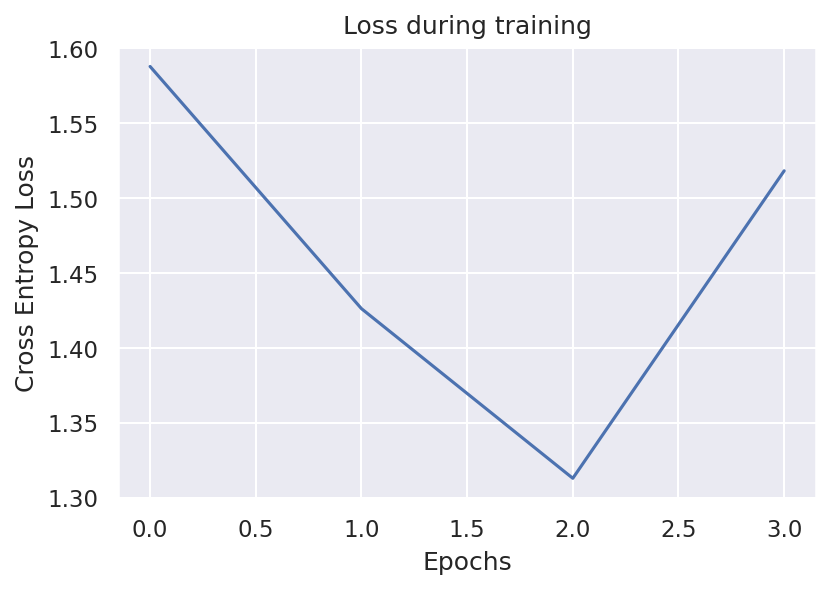

In [ ]:
epochs =4
loss = []
for j in tqdm_notebook(range(epochs)): 
  for i, data in enumerate(trainloader,0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = net(inputs)
    loss_train = loss_func(output,labels)
    
    loss_train.backward()
    opt.step()

  loss.append(loss_train.item())   
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Here is our first training loop, for each epoch, all the batches in trainloader are iterated over
#In each batch, input and labels are separated, input is passed to the network to give output
#Output and labels are passed on to the loss function to compute loss
#loss.backward is done for back propagation
#Optimiser is used to update the network, it had taken all the parameters as inputs 
#Loss values are store and plotted as usual

In [ ]:
train_accuracy = evaluation(trainloader,net)
test_accuracy = evaluation(testloader,net)
print('Training Accuracy is: ',train_accuracy)
print('Testing Accuracy is: ',test_accuracy)

#Here we call the evaluation function on the trainloader and the testloader 
#Our trained model is used for prediction 
#CIFAR 10 is a challenging data set, which would give low accuracies with insufficient time
#State-of-the-art results on CIFAR require hours of training on deeper networks with dedicated hardware support

Training Accuracy is:  51.483999999999995
Testing Accuracy is:  49.95


In [ ]:
def visualize_batch(dataloader,network,classes, predicted=True):
  dataiter = iter(dataloader)
  images,labels = dataiter.next()
  images,labels = images.to(device), labels.to(device)
  if predicted == True:
    output = network(images)
    _,pred_classes = torch.max(output, axis=1)
  grid = torchvision.utils.make_grid(images)

  plt.imshow(np.transpose(grid.cpu().numpy(),(1,2,0)))
  plt.show()
  if predicted == True:
    print (" ".join([classes[pred_classes[j]] for j in range(128)]))
  else:
    print (" ".join([classes[labels[j]] for j in range(128)]))

#We want to use the network we have to predict on the test data, so we'll write function which returns the names of the objects
#We take a single batch of 128 images, pass them through the network at once, and also put them in a grid to visualize.
#We display the grid and if predicted is passed as true then print out the classes as given by the network
#If predicted is given as false, we will print out the ground truths or the true values as given in the data

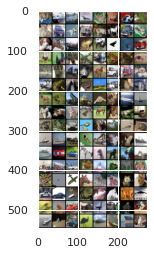

cat ship ship airplane frog frog automobile frog cat automobile airplane truck dog horse truck ship dog horse ship frog horse airplane deer truck dog bird deer airplane truck frog frog dog deer dog truck bird deer automobile truck dog deer frog dog frog airplane truck cat truck horse frog truck ship airplane cat ship ship horse horse deer frog horse cat frog cat frog bird automobile bird cat horse bird frog ship ship airplane bird truck cat cat ship ship automobile automobile horse bird dog bird horse ship truck airplane cat ship frog deer frog frog airplane airplane horse deer dog frog cat automobile automobile cat frog ship horse deer airplane frog bird automobile cat airplane deer bird horse ship cat automobile bird ship airplane ship cat


In [ ]:
visualize_batch(testloader,net,classes, predicted= False)

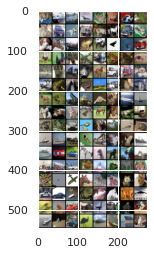

cat truck automobile ship deer frog automobile frog dog automobile ship truck cat horse automobile ship dog cat ship frog horse airplane airplane truck deer frog frog airplane truck frog cat deer cat frog truck horse frog truck truck dog airplane frog cat frog airplane truck cat ship deer frog truck airplane frog frog ship ship horse frog cat bird horse cat frog cat frog bird truck airplane dog truck deer frog ship ship airplane deer truck dog cat ship ship automobile automobile airplane cat airplane ship ship ship truck truck deer ship frog horse dog deer airplane bird horse deer deer frog cat automobile automobile ship frog dog dog frog airplane bird bird truck horse airplane horse frog dog ship dog automobile bird airplane bird ship cat


In [ ]:
visualize_batch(testloader,net,classes, predicted= True)

###Here we want to visualise the output of one of the convolutions of LeNet, i.e. one of the channels/kernels which is used to extract features from the image

In [ ]:
net.to(device)

#We move the network to the device mentioned 

CNN_LeNet(
  (conv): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (feedf): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [ ]:
trainset2 = torchvision.datasets.ImageData(root='./data', train=True,download=True,transform=transforms.ToTensor())
trainloader2 = torch.utils.data.DataLoader(trainset2,batch_size=4,shuffle=True)

#We specify another trainset and trainloader with a batch size of 4

Files already downloaded and verified


In [ ]:
dataiter2 = iter(trainloader2)
data = dataiter2.next()
images,labels = dataiter2.next()
output = net.conv[0](images)
output.shape

#We select a batch from trainloader and pass it through the first convolution of the LeNet network

torch.Size([4, 6, 28, 28])

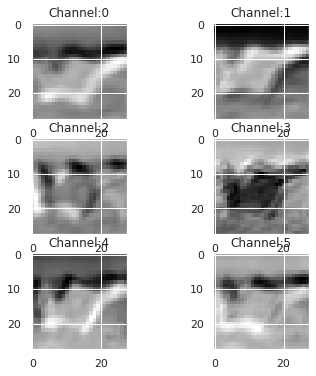

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(6,6))
for i in range(6):
  ax = plt.subplot(3,2,i+1)
  ax.imshow(output[0,i,:,:].detach().numpy(),cmap='binary')
  ax.set_title('Channel:'+ str(i))

#We set some subplots and iterate over the channels of the output of the first convolution
#These are then visualised

In [ ]:
device = torch.device("cuda")
print(device)

#If GPU hardware is enabled, this code cell returns cuda

cuda


In [ ]:
class CNN_LeNet2(nn.Module):

  def __init__(self):
    super(CNN_LeNet2,self).__init__()  #Check this 
    self.conv = nn.Sequential(
        nn.Conv2d(3,6,5),   #(N,3,32,32) -> (N,6,28,28)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),  #(N,6,28,28) -> (N,6,14,14)
        nn.Conv2d(6,16,5),  #(N,6,14,14) -> (N,16,10,10)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2) #(N,16,10,10) -> (N,16,5,5)
    )
    self.feedf = nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )
    
  
  def forward(self,x):
    x1 = self.conv(x)
    # print(x1.shape)
    x2 = x1.view(x1.shape[0],-1)
    # print(x2.shape)
    x3 = self.feedf(x2)
    # print(x3.shape)
    return x3

#This is our second LeNet with ReLU instead of Tanh as the activation function 

In [ ]:
net2 = CNN_LeNet2()
net2.to(device)
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(net2.parameters(),weight_decay=0.001)

#Same as before, instantiating, setting loss and optimizer 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(1.9572, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.6141, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.5438, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4868, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4410, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0428, device='cuda:0', grad_fn=<NllLossBackward>)



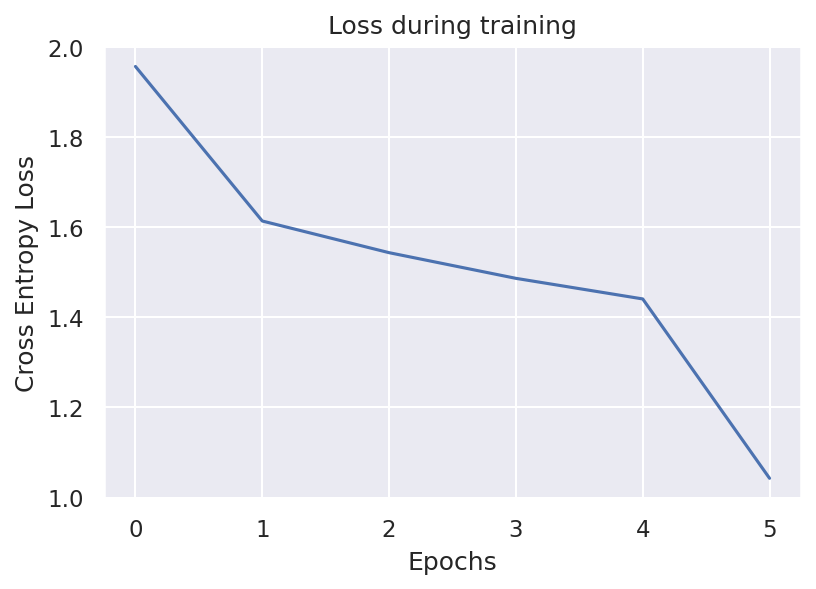

In [ ]:
epochs =6
loss = []
for j in tqdm_notebook(range(epochs)): 
  for i, data in enumerate(trainloader,0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = net2(inputs)
    loss_train = loss_func(output,labels)
    
    loss_train.backward()
    opt.step()
  loss.append(loss_train.item())   
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training the model as usual, loss plot is also generated 

In [ ]:
train_accuracy = evaluation(trainloader,net2)
test_accuracy = evaluation(testloader,net2)
print('Training Accuracy is: ',train_accuracy)
print('Testing Accuracy is: ',test_accuracy)

#Calculating training and testing accuracy
#ReLU is a better activation for images and this can be seen with better training curves

Training Accuracy is:  52.766000000000005
Testing Accuracy is:  52.1


###MNIST
We use the MNIST dataset, contains handwritten numbers in images, with 28x28 pixels and one channel

In [ ]:
device = torch.device("cuda")
print(device)

#Setting the device

cuda


In [ ]:
trainset3 = torchvision.datasets.MNIST(root='./data2', train=True,download=True,transform=transforms.ToTensor())

#We load our trainset in our directory

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data2/MNIST/raw/train-images-idx3-ubyte.gz to ./data2/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data2/MNIST/raw/train-labels-idx1-ubyte.gz to ./data2/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data2/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data2/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data2/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data2/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
classes2 = ['0','1','2','3','4','5','6','7','8','9']			

#Writing down the classes to predict from

In [ ]:
trainloader3 = torch.utils.data.DataLoader(trainset3,batch_size=4,shuffle=True)
dataiter = iter(trainloader3)
images,labels = dataiter.next()
print(images.shape)
print(labels[0].item())

#Trainloader shuffles the data with a batch size of 4 and a batch is selected 

torch.Size([4, 1, 28, 28])
9


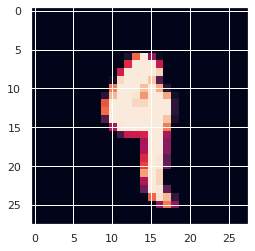

In [ ]:
plt.imshow(images[0].numpy().transpose(1,2,0).squeeze())

#Visualizing one image

In [ ]:
def visualize2(image):
  img = image.numpy()
  img_2 = np.transpose(img,(1,2,0)).squeeze()
  img_2
  plt.figure(figsize=(1,1))
  plt.imshow(img_2)
  plt.show()

#Same visualization function as before, .squeeze is used since images have only one channel

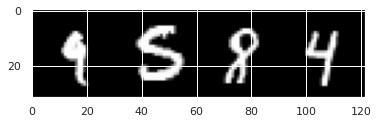

9 5 8 4


In [ ]:
grid = torchvision.utils.make_grid(images)
plt.imshow(np.transpose(grid.numpy(),(1,2,0)))
plt.show()
print (" ".join([classes2[labels[j]] for j in range(4)]))

#Visualize the first batch with their respective labels 

In [ ]:
class CNN_LeNet3(nn.Module):

  def __init__(self):
    super(CNN_LeNet3,self).__init__()  #Check this 
    self.conv = nn.Sequential(
        nn.Conv2d(1,6,5),   #(N,1,28,28) -> (N,6,24,24)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),  #(N,6,24,24) -> (N,6,12,12)
        nn.Conv2d(6,16,5),  #(N,6,12,12) -> (N,16,8,8)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2) #(N,16,8,8) -> (N,16,4,4)
    )
    self.feedf = nn.Sequential(
        nn.Linear(256,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )
    
  
  def forward(self,x):
    x1 = self.conv(x)
    # print(x1.shape)
    x2 = x1.view(x1.shape[0],-1)
    # print(x2.shape)
    x3 = self.feedf(x2)
    # print(x3.shape)
    return x3

#We define a modified LeNet network here
#Input channel is changed from 3 to 1
#First layer of the fully connected network has 256 instead of 400 inputs (since 32x32 becomes 28x28 at the start)
#Rest is the same as before 

In [ ]:
trainset3 = torchvision.datasets.MNIST(root='./data', train=True,download=True,transform=transforms.ToTensor())
trainloader3 = torch.utils.data.DataLoader(trainset3,batch_size=128,shuffle=True)
testset3 = torchvision.datasets.MNIST(root='./data', train=False,download=True,transform=transforms.ToTensor())
testloader3 = torch.utils.data.DataLoader(testset3,batch_size=128,shuffle=False)


#We define new trainloaders and testloader with batches of 128 for training

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


In [ ]:
net3 = CNN_LeNet3()
net3.to(device)
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(net3.parameters())

#Instantiate, set loss and optimizer 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(0.3547, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0562, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0495, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0372, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1030, device='cuda:0', grad_fn=<NllLossBackward>)



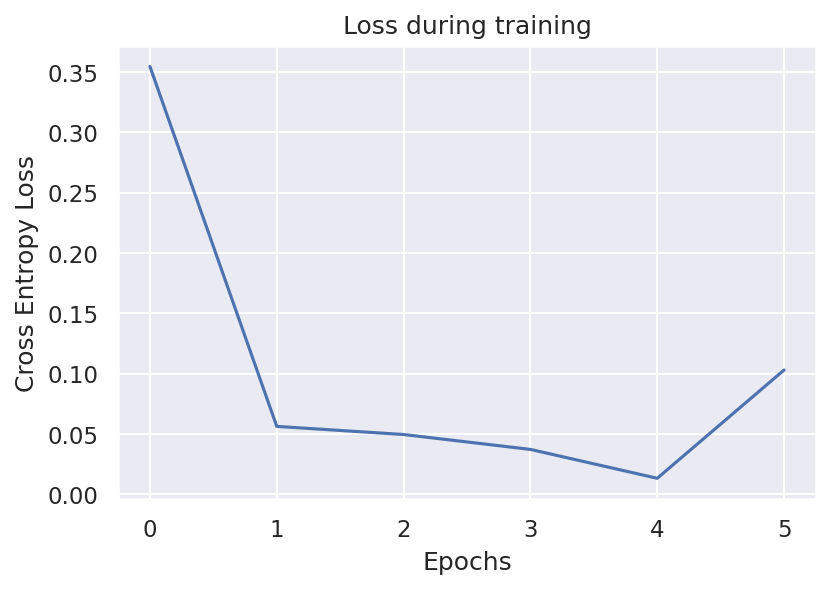

In [ ]:
epochs =6
loss = []
for j in tqdm_notebook(range(epochs)): 
  for i, data in enumerate(trainloader3,0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = net3(inputs)
    loss_train = loss_func(output,labels)
    
    loss_train.backward()
    opt.step()
  loss.append(loss_train.item())   
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training loop same as earlier 

In [ ]:
train_accuracy = evaluation(trainloader3,net3)
test_accuracy = evaluation(testloader3,net3)
print('Training Accuracy is: ',train_accuracy)
print('Testing Accuracy is: ',test_accuracy)

#Calculating accuracy on training and test data
#MNIST is a relatively simple datasets and getting large accuracies is fairly easy

Training Accuracy is:  98.41666666666666
Testing Accuracy is:  98.15


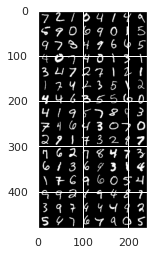

7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5


In [ ]:
visualize_batch(testloader3,net,classes2, predicted= False)

#Calling the same prediction function we built earlier

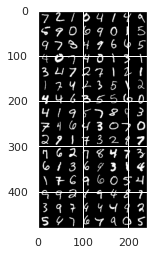

7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5


In [ ]:
visualize_batch(testloader3,net3,classes2, predicted= True)

## Working with deeper CNNs

The CNNs we have built and trained so far, are quite primitive and are unable to recognize the finer features in images which could improve accuracy. There are therefore, deeper CNNs we must explore and train to get more meaningful insights into our data. Some popular CNNs proposed in research have been used and trained before. These are quite complex, having millions of parameters and so are challenging to train. A concept known as transfer learning is applied here, which means that pre-trained networks available online are imported and slightly modified to save time and compute resources. 

In [ ]:
train_transform = torchvision.transforms.Compose([
  transforms.RandomResizedCrop(224),
  transforms.ToTensor(),
  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

test_transform = torchvision.transforms.Compose([
  transforms.RandomResizedCrop(224),
  transforms.ToTensor()
  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

#To train some of the networks and acheive better results, we need to apply some transformations to our data
#The size of the data is enlarged, it is moved to tensor type and normalized to ease the load on the network

In [ ]:
trainset4 = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=train_transform)
testset4 = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainloader4 = torch.utils.data.DataLoader(trainset4,batch_size=4,shuffle=True)
dataiter = iter(trainloader4)
images,labels = dataiter.next()
print(images.shape)
print(images[0].shape)
print(labels[0].item())

#We shuffle our data first and then load it in batches of 4 to see its size and visualize, this is stored in trainloader
#We take one of the batches stored in trainloader using iter and store its images and labels 
#We can then visualize our image and see its corresponding labels 

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
8


In [ ]:
def visualize_batch(dataloader):
  images, labels = iter(dataloader).next()
  img = images/2 + 0.5
  grid = torchvision.utils.make_grid(img)
  plt.imshow(np.transpose(grid,(1,2,0)))
  plt.show()
  print (" ".join([classes[labels[j]] for j in range(4)]))

#We write a function for visualizing an image
#Image in tensor form is converted to numpy first so it can be compatible with matplotlib
#Image is of the size (3x32x32) and is transposed to (32x32x3) after which we can use plt.imshow

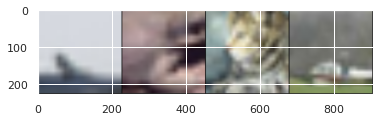

automobile frog cat airplane


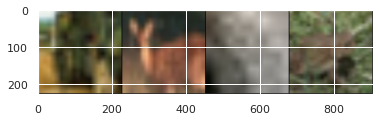

truck deer bird frog


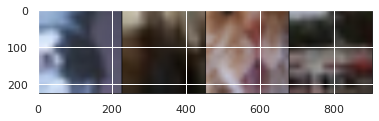

dog deer cat truck


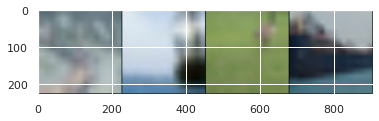

deer ship bird ship


In [ ]:
for i in range(4):
  visualize_batch(trainloader4)

**VGG** is a deep convolutional Network named after the Visual Geometry Group from Oxford. This network was originally trained on the ImageNet Dataset and has about 138 Million parameters.

In [ ]:
vgg = models.vgg16_bn()
print(vgg)


#We can print the network to study its architecture

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
new_in_features = vgg.classifier[-1].in_features
modified_layer = nn.Linear(new_in_features,10)
mod_classifier = list(vgg.classifier[:-1])
mod_classifier.extend([modified_layer])
vgg.classifier = nn.Sequential(*mod_classifier)

#THe original vgg returns an output over a 1000 classes, so we need to modify the last layer to work with CIFAR-10
#We create a layer and then take the list of the FeedForward layers, adding in our modified layer
#This is then added back into the network
#Other simpler ways to do it have also been shown below

In [ ]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
device = torch.device('cuda')
print(device)

cuda


In [ ]:
vgg = vgg.to(device)
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.SGD(vgg.parameters(),lr=0.05)

#Moving our network to GPU, setting the loss criterion and optimizer

In [ ]:
trainloader5 = torch.utils.data.DataLoader(trainset4,batch_size=16,shuffle=True)
testloader5 = torch.utils.data.DataLoader(testset4,batch_size=16,shuffle=True)

#Creating our dataloaders with batch size of 16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(2.8201, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3217, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2756, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.6402, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2450, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.6341, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1728, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.1728, device='cuda:0', grad_fn=<NllLossBackward>)



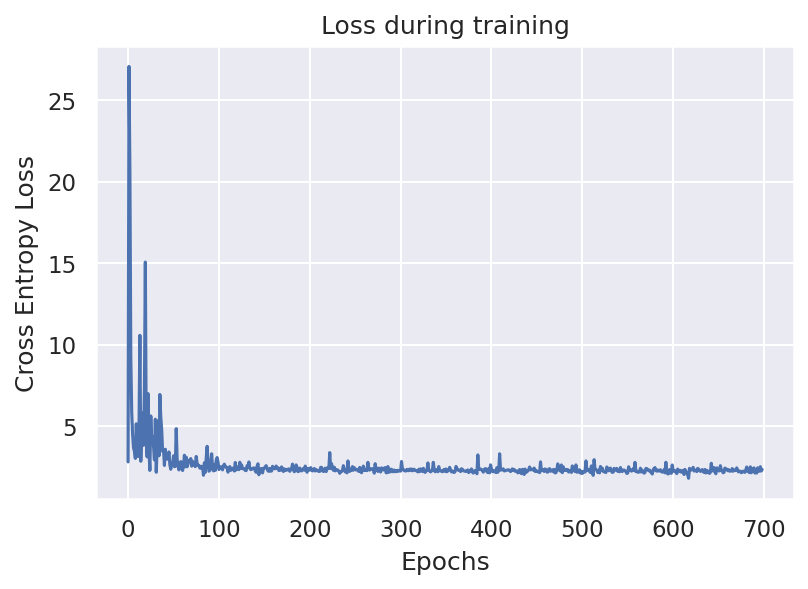

In [ ]:
epochs =1
loss = []
for j in tqdm_notebook(range(epochs)): 
  k = 0
  for i, data in enumerate(trainloader5,0):
    k += 1
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = vgg(inputs)
    loss_train = loss_func(output,labels)
    loss_train.backward()
    opt.step()

    del inputs, labels, output
    torch.cuda.empty_cache()
    if k%100 == 0:
      print(loss_train)
    if k == 700:
      break
    loss.append(loss_train.item())   
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training loop same as earlier 

In [ ]:
vgg = models.vgg16_bn(pretrained=True)

#Pretrained = True does what is known as transfer learning
#The trained weights of the ImageNet dataset are also brought in along with the model
#Although our dataset is different, this is a better starting point than random initialization

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [ ]:
for param in vgg.parameters():
  param.requires_grad = False

input_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(input_features,10)

#Since we have pretrained weights, we don't need to train all the layers in the network, we can just train our last modified layer
#This is done by first removing requires_grad from all existing layers and then adding our new modified layer with requires_grad = True

In [ ]:
for param in vgg.parameters():
  if param.requires_grad == True:
    print(param.shape)

#Only weights and biases from the last layer have requires_grad

torch.Size([10, 4096])
torch.Size([10])


In [ ]:
vgg = vgg.to(device)
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.SGD(vgg.parameters(),lr=0.05)

#Setting up our model as usual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(1.7784, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.0250, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0890, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.1823, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2206, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2271, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2867, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2867, device='cuda:0', grad_fn=<NllLossBackward>)



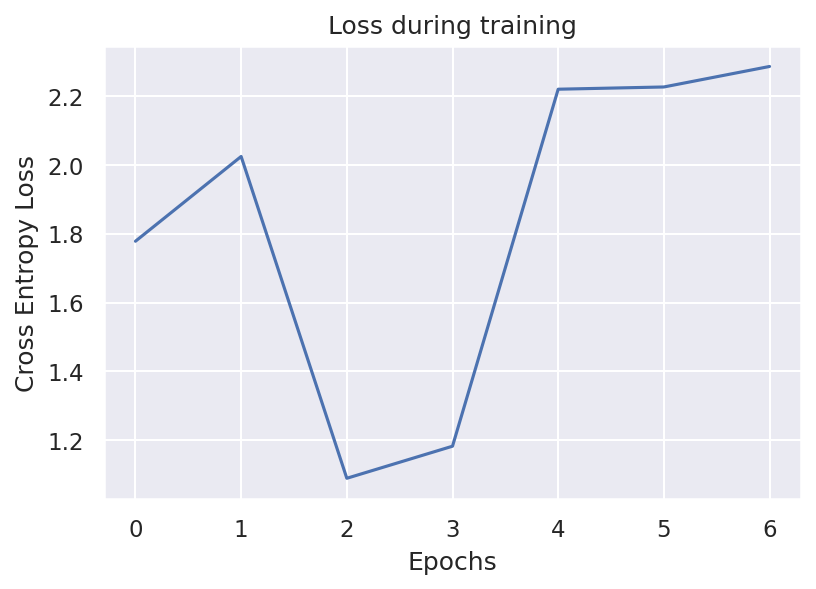

In [ ]:
epochs =1
loss = []
for j in tqdm_notebook(range(epochs)): 
  k = 0
  for i, data in enumerate(trainloader5,0):
    k += 1
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = vgg(inputs)
    loss_train = loss_func(output,labels)
    loss_train.backward()
    opt.step()

    del inputs, labels, output
    torch.cuda.empty_cache()
    if k%100 == 0:
      print(loss_train)
      loss.append(loss_train.item())   
    if k == 700:
      break
    
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training loop same as earlier 

In [ ]:
vgg = models.vgg16_bn(pretrained=True)
for param in vgg.parameters():
  param.requires_grad = False

input_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(input_features,10)
for param in vgg.parameters():
  if param.requires_grad == True:
    print(param.shape)


vgg = vgg.to(device)
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.SGD(vgg.parameters(),lr=0.05)

#Same as earlier, we have VGG-16 but with Batch normalization 
#Batch-Normalization is the technique of standardizing each input layer to ensure faster and stable training
#Modified layer is added same as before 

torch.Size([10, 4096])
torch.Size([10])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


min loss is: 2.332686424255371
min loss is: 2.1606931686401367
min loss is: 2.0993573665618896
min loss is: 2.094501495361328
min loss is: 2.0358529090881348
min loss is: 1.9592164754867554
min loss is: 1.8257391452789307
min loss is: 1.0869828462600708
min loss is: 0.9847134351730347
1.0   tensor(1.6575, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 0.855534017086029
2.0   tensor(1.3891, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 0.7806951403617859
3.0   tensor(2.2283, device='cuda:0', grad_fn=<NllLossBackward>)
4.0   tensor(2.4866, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 0.6245395541191101
5.0   tensor(1.9771, device='cuda:0', grad_fn=<NllLossBackward>)
6.0   tensor(1.9463, device='cuda:0', grad_fn=<NllLossBackward>)
7.0   tensor(2.3885, device='cuda:0', grad_fn=<NllLossBackward>)
8.0   tensor(1.8227, device='cuda:0', grad_fn=<NllLossBackward>)
9.0   tensor(2.2188, device='cuda:0', grad_fn=<NllLossBackward>)
10.0   tensor(2.9541, device='cuda

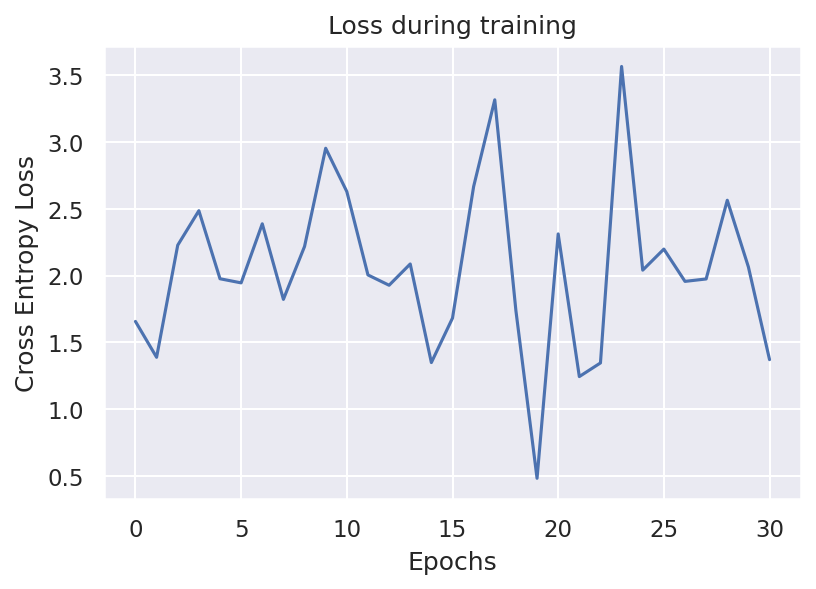

In [ ]:
epochs =1
loss = []
min_loss = 1000
for j in tqdm_notebook(range(epochs)): 
  k = 0
  for i, data in enumerate(trainloader5,0):
    k += 1
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = vgg(inputs)
    loss_train = loss_func(output,labels)
    loss_train.backward()
    opt.step()

    if min_loss > loss_train.item():
      min_loss = loss_train.item()
      print('min loss is:', min_loss)
      best_model = copy.deepcopy(vgg.state_dict())

    del inputs, labels, output
    torch.cuda.empty_cache()
    if k%100 == 0:
      print(k/100,' ',loss_train)
      loss.append(loss_train.item())   

    
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training loop same as earlier 

In [ ]:
vgg.load_state_dict(best_model)

<All keys matched successfully>

In [ ]:
train_accuracy = evaluation(trainloader5,vgg)
test_accuracy = evaluation(testloader5,vgg)
print('Training Accuracy is: ',train_accuracy)
print('Testing Accuracy is: ',test_accuracy)

#Calculating accuracy on training and test data

Training Accuracy is:  44.62
Testing Accuracy is:  43.33


**ResNet**, short for residual network is commonly used on with many computer vision tasks and was introduced in 2015 for the ImageNet challenge. The main breakthrough with this network is its very deep architecture, which allows better training by allowing information to flow regularly through the network as well as skip layers in between. This network has 18 layers with about 44 million parameters.

In [ ]:
resnet = models.resnet18(pretrained=True)
 

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in resnet.parameters():
  param.requires_grad = False

input_features = resnet.fc.in_features
resnet.fc = nn.Linear(input_features,10)

for param in resnet.parameters():
  if param.requires_grad == True:
    print(param.shape)

#Modifying the last layer as usual

torch.Size([10, 512])
torch.Size([10])


In [ ]:
resnet = resnet.to(device)
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.SGD(resnet.parameters(),lr=0.01)

#Setting up the training process with loss and optimizer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


min loss is: 1.690584659576416
min loss is: 1.223116397857666
min loss is: 1.0841519832611084
min loss is: 0.8630267977714539
min loss is: 0.80687016248703
min loss is: 0.7532589435577393
min loss is: 0.6932098865509033
1.0   tensor(1.5397, device='cuda:0', grad_fn=<NllLossBackward>)
2.0   tensor(1.7226, device='cuda:0', grad_fn=<NllLossBackward>)
3.0   tensor(0.9624, device='cuda:0', grad_fn=<NllLossBackward>)
4.0   tensor(1.2327, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 0.6483587026596069
5.0   tensor(1.8303, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 0.5736665725708008
6.0   tensor(1.6549, device='cuda:0', grad_fn=<NllLossBackward>)
7.0   tensor(1.1087, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 0.5169997811317444
8.0   tensor(1.5560, device='cuda:0', grad_fn=<NllLossBackward>)
9.0   tensor(1.5395, device='cuda:0', grad_fn=<NllLossBackward>)
10.0   tensor(1.8356, device='cuda:0', grad_fn=<NllLossBackward>)
11.0   tensor(1.0565, device='cud

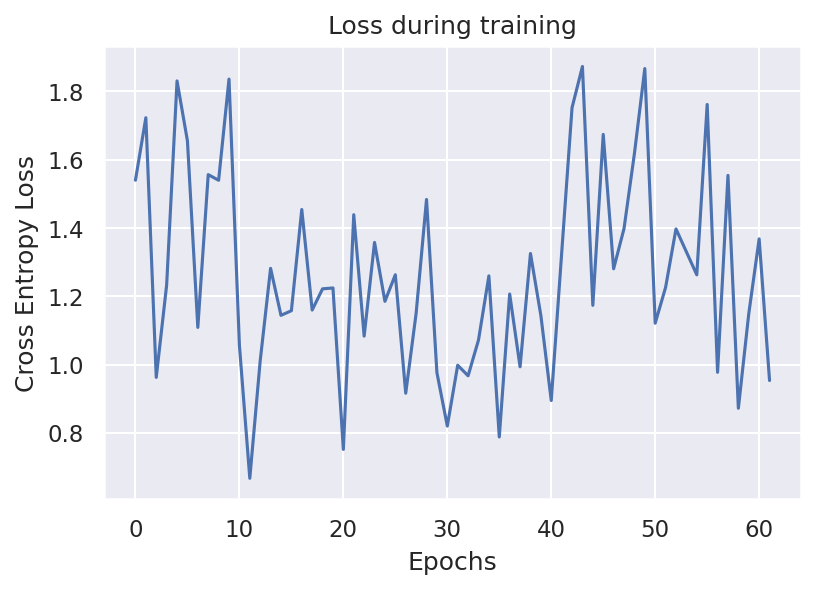

In [ ]:
epochs =2
loss = []
min_loss = 1000
for j in tqdm_notebook(range(epochs)): 
  k = 0
  for i, data in enumerate(trainloader5,0):
    k += 1
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = resnet(inputs)
    loss_train = loss_func(output,labels)
    loss_train.backward()
    opt.step()

    if min_loss > loss_train.item():
      min_loss = loss_train.item()
      print('min loss is:', min_loss)
      best_model = copy.deepcopy(resnet.state_dict())

    del inputs, labels, output
    torch.cuda.empty_cache()
    if k%100 == 0:
      print(k/100,' ',loss_train)
      loss.append(loss_train.item())   

    
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training loop same as earlier 

In [ ]:
train_accuracy = evaluation(trainloader5,resnet)
test_accuracy = evaluation(testloader5,resnet)
print('Training Accuracy is: ',train_accuracy)
print('Testing Accuracy is: ',test_accuracy)

#Calculating accuracy on training and test data

Training Accuracy is:  56.538
Testing Accuracy is:  55.58


In [ ]:
resnet.load_state_dict(best_model)

<All keys matched successfully>

In [ ]:
print('Training Accuracy is: ',train_accuracy)
print('Testing Accuracy is: ',test_accuracy)

#Calculating accuracy on training and test data

Training Accuracy is:  56.14
Testing Accuracy is:  53.900000000000006


In [ ]:
train_transform2 = torchvision.transforms.Compose([
  transforms.RandomResizedCrop(299),
  transforms.ToTensor(),
  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

test_transform2 = torchvision.transforms.Compose([
  transforms.RandomResizedCrop(299),
  transforms.ToTensor()
  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [ ]:
trainset5 = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=train_transform2)
testset5 = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=test_transform2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainloader6 = torch.utils.data.DataLoader(trainset5,batch_size=16,shuffle=True)
testloader6 = torch.utils.data.DataLoader(testset5,batch_size=16,shuffle=True)

#Setting our dataloader with batch size of 16

**InceptionNet** is a deep convolutional neural network that consists of an architectural design having repeating units known as inception modules. The inception module is advantageous in the sense that it allows for us to use multiple types of filter sizes instead of being restricted to a single filter size, in a single image block, which we then concatenate and pass onto the next layer. This network has 43 layers with 24 million parameters.

In [ ]:
inceptionet = models.inception_v3(pretrained=True)
print(inceptionet)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
for param in inceptionet.parameters():
  param.requires_grad = False

In [ ]:
input_features = inceptionet.fc.in_features
inceptionet.fc = nn.Linear(input_features,10)

input_aux_features = inceptionet.AuxLogits.fc.in_features
inceptionet.AuxLogits.fc = nn.Linear(input_aux_features,10)

#Adding our modified last layer

In [ ]:
for param in inceptionet.parameters():
  if param.requires_grad == True:
    print(param.shape)

#The reason there are more layers here is that the inception net also gives an auxiliary output in between which we also need to modify to distribute over 10 classes

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [ ]:
inceptionet = inceptionet.to(device)
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.SGD(inceptionet.parameters(),lr=0.01)

#Setting up the training 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


min loss is: 2.436614751815796
min loss is: 2.267165184020996
min loss is: 2.2655932903289795
min loss is: 2.2654056549072266
min loss is: 2.239778995513916
min loss is: 2.1660983562469482
min loss is: 2.1413421630859375
min loss is: 2.090003728866577
min loss is: 1.9756284952163696
min loss is: 1.9529231786727905
1.0   tensor(2.1090, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 1.939807653427124
min loss is: 1.934001088142395
min loss is: 1.9298521280288696
min loss is: 1.8426169157028198
min loss is: 1.826216697692871
min loss is: 1.7061938047409058
2.0   tensor(2.0074, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 1.6332392692565918
min loss is: 1.5166540145874023
3.0   tensor(2.0792, device='cuda:0', grad_fn=<NllLossBackward>)
4.0   tensor(1.6001, device='cuda:0', grad_fn=<NllLossBackward>)
min loss is: 1.4658730030059814
min loss is: 1.2735180854797363
5.0   tensor(1.9189, device='cuda:0', grad_fn=<NllLossBackward>)
6.0   tensor(1.7361, device='cuda:0', grad

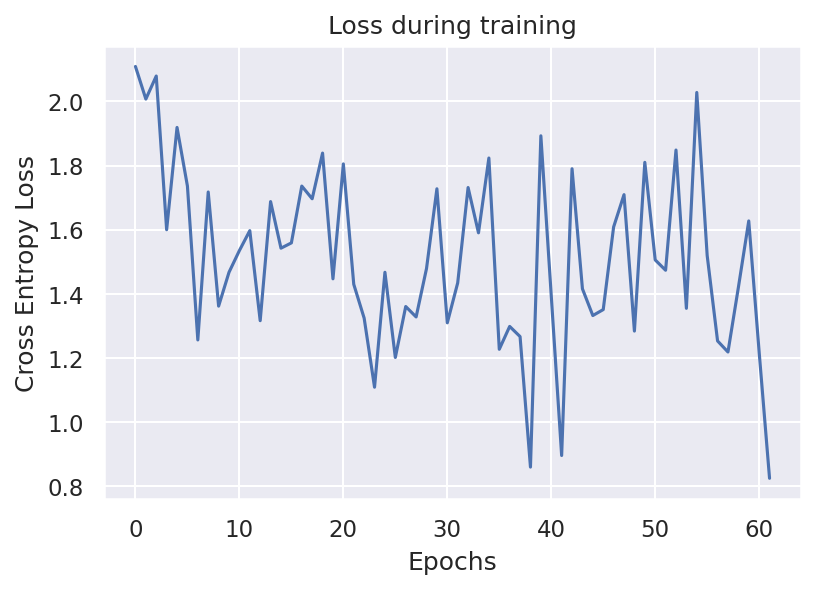

In [ ]:
epochs =2
loss = []
min_loss = 1000
for j in tqdm_notebook(range(epochs)): 
  k = 0
  for i, data in enumerate(trainloader6,0):
    k += 1
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output, aux_output = inceptionet(inputs)
    loss_train = loss_func(output,labels)
    loss_train.backward()
    opt.step()

    if min_loss > loss_train.item():
      min_loss = loss_train.item()
      print('min loss is:', min_loss)
      best_model = copy.deepcopy(inceptionet.state_dict())

    del inputs, labels, output
    torch.cuda.empty_cache()
    if k%100 == 0:
      print(k/100,' ',loss_train)
      loss.append(loss_train.item())   

    
  print(loss_train)


plt.figure(dpi =150)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss during training')
plt.show()

#Training loop same as earlier 

In [ ]:
def evaluation2(dataloader, network):
  accuracy_count = 0
  total = 0
  for data in dataloader:
    input,labels = data
    input, labels = input.to(device), labels.to(device)
    output, aux_output = network(input)
    total += labels.size(0)
    max_values1,max_classes1 = torch.max(output, axis=1)
    accuracy_count += (labels == max_classes1).sum().item()

  computed_accuracy = (accuracy_count/total)*100
  return computed_accuracy

#Here is our evaluation function
#We pass it any data (train/test loader and the network)
#It iterates over that, takes each batch with its inputs and labels
#Inputs are passed to the network, output is generated and compared to labels and accuracy count is maintained
#Total accuaracy_count is divided by total no of labels to give the answer in percentage
#Care is taken to move inputs and labels to device

In [ ]:
training_accuracy = evaluation2(trainloader6,inceptionet)
test_accuracy = evaluation2(testloader6,inceptionet)
print('Training accuracy is: ',training_accuracy)
print('Test accuracy is: ',test_accuracy)


Training accuracy is:  48.042
Test accuracy is:  47.660000000000004


In [ ]:
inceptionet.load_state_dict(best_model)

<All keys matched successfully>

In [ ]:
training_accuracy = evaluation2(trainloader6,inceptionet)
test_accuracy = evaluation2(testloader6,inceptionet)
print('Training accuracy is: ',training_accuracy)
print('Test accuracy is: ',test_accuracy)


Training accuracy is:  46.932
Test accuracy is:  46.760000000000005
